# a) How many observations and variables are in the dataset? 
### There are 17487925 observations and 18 variables

In [45]:
import pandas as pd
import numpy as np


# Import the data
data = pd.read_csv("/Users/troy/Desktop/2020_-_Full_Cities_Dataset.csv")

In [3]:
# Get the sum of the all the data
sum(data.count())

17487925

In [4]:
# Get the length of the columns
len(data.columns)

18

# b) How many unique cities are there in the dataset?
### There are 776 unique cities 

In [5]:
# We are going to use the Organization to get the unique cities
data.columns

Index(['Questionnaire', 'Year Reported to CDP', 'Account Number',
       'Organization', 'Country', 'CDP Region', 'Parent Section', 'Section',
       'Question Number', 'Question Name', 'Column Number', 'Column Name',
       'Row Number', 'Row Name', 'Response Answer', 'Comments', 'File Name',
       'Last update'],
      dtype='object')

In [6]:
# Get the unique data from the "Organization" column and calculate the length
cities = data['Organization'].unique()
len(cities)

776

# c) Please plot the total cities by continent that have responded to the questionnaire.

In [7]:
# Only select the row that has response answer and work on data1
data1 = data[data['Response Answer'].notna()]

In [8]:
# Group by 'CDP Region and select the Organization colomn'
new_data = data1.groupby('CDP Region')['Organization']

In [9]:
new_data.describe()

,count,unique,top,freq
CDP Region,,,,
Africa,37301,33,City of Cape Town,2242
East Asia,47100,35,Toyama City,3738
Europe,194225,160,City of Paris,2651
Latin America,322184,285,Municipalidad de Belén,3242
Middle East,5916,5,Tel Aviv-Yafo Municipality,1377
North America,244364,186,City of Windsor,3534
South and West Asia,20567,21,Rajkot Municipal Corporation,1985
Southeast Asia and Oceania,64186,51,City of Sydney,2523


# d) How many US cities have incorporated emissions reduction targets in their master planning?

### There are 120 US citites have incorporated emissions reduction targests in their master planning


In [10]:
# Since question 1.a only appears if the answer of question 1 is yes, so we only have to deal with question 1.a
# Filter out with only Emissions reduction targets goal
q1_a = data.loc[data['Question Name'] == 'Please detail which goals and targets are incorporated in your city’s master plan and describe how these goals are addressed in the table below.']

In [11]:
# left with only U.S cities
q1_a_us = q1_a.loc[q1_a['CDP Region'] == 'North America']

In [12]:
# With response answer 'Emissions reduction targets' only 
q1_a_us_er = q1_a_us.loc[q1_a_us['Response Answer'] == 'Emissions reduction targets']

In [13]:
# Filter out the unique cities
q1_a_us_er_unique = q1_a_us_er['Organization'].unique()

In [14]:
# Now we has the U.S cities that have the Emissions reduction targets
q1_a_us_er_unique

array(['New York City',
       'Metropolitan Washington Council of Governments (COG)',
       'City of Kingston, ON', 'City of Takoma Park, MD',
       'City of New Orleans', 'City of Key West, FL', 'City of Tempe, AZ',
       'City of Indianapolis', 'Boulder County', 'City of Grand Rapids',
       'City of Omaha', 'City of Ottawa', 'City of Charlotte',
       'City of Ann Arbor', 'City of Dubuque', 'City of Hayward',
       'Village of Park Forest, IL', 'City of Tacoma',
       'City of Sacramento', 'Kansas City', 'Town of Breckenridge, CO',
       'City of Northampton, MA', 'City of Dallas', 'City of San Antonio',
       'City of Buffalo', 'Summit County, UT', 'City of Milwaukee',
       'City of Santa Monica', 'City of Des Moines',
       'Chicago Metropolitan Mayors Caucus', 'City of Cambridge',
       'San Luis Obispo', 'City of Toronto',
       'City of Saratoga Springs, NY', 'City of Park City, UT',
       'City of Henderson', 'City of San Francisco', 'Cuyahoga County',
       '

In [16]:
# Now let's count the how many items in the array
len(q1_a_us_er_unique)

120

# f) Please create a meaningful visualization of total scope 1 emissions. What can you tell from your visualization?

In [300]:
# Scope 1 emission is Direct emissions due to fuel combustion in the buildings, equipment/facilities and
# transportation sectors within the city boundary. These emissions physically occur inside the
# city boundary
q46_b = data.loc[data['Question Name'] == 'Please provide a summary of emissions by sector and scope as defined in the Global Protocol for Community Greenhouse Gas Emissions Inventories (GPC) in the table below.']

In [301]:
# Let's filter out with only Scope 1 emissions left
q46_b_s1 = q46_b[q46_b['Row Name'].str.contains("Scope 1")]

In [302]:
q46_b_s1.to_csv("q46_b_s1.csv",sep=',', encoding='utf-8')

In [303]:
# Drop the null values
q46_b_s1 = q46_b_s1[q46_b_s1['Response Answer'].notna()]

In [304]:
# Drop the Not applicable and other string value, so we have the numeric values for the visualization 
# The way we do that is by convert all the value in the column into numeric type and leave errors ones(strings) as blank
# And then drop them
q46_b_s1['Response Answer'] = pd.to_numeric(q46_b_s1['Response Answer'], errors='coerce')
q46_b_s1 = q46_b_s1.dropna(subset=['Response Answer'])

In [305]:
# Import the pyplot package for the visualization
import matplotlib.pyplot as plt

In [306]:
# Let's check out some columns we can use for the visualization
q46_b_s1.columns

Index(['Questionnaire', 'Year Reported to CDP', 'Account Number',
       'Organization', 'Country', 'CDP Region', 'Parent Section', 'Section',
       'Question Number', 'Question Name', 'Column Number', 'Column Name',
       'Row Number', 'Row Name', 'Response Answer', 'Comments', 'File Name',
       'Last update'],
      dtype='object')

In [307]:
# Now let's get the two column that we want
q46_b_s1 = q46_b_s1[['Country', 'Response Answer']]

In [308]:
# Group by country and with mean value of the emission
q46_b_s1_grouped = q46_b_s1.groupby(['Country']).mean()

In [309]:
# Rename the column
q46_b_s1_grouped = q46_b_s1_grouped.rename(columns = {'Response Answer':'Emissions'})

## Base on the data, we can see that the Peru has the most average scope 1 emissions, China, Honkong Region comes as the second and the U.S is the third

Text(0.5, 1.0, 'Average scope 1 emissions by country')

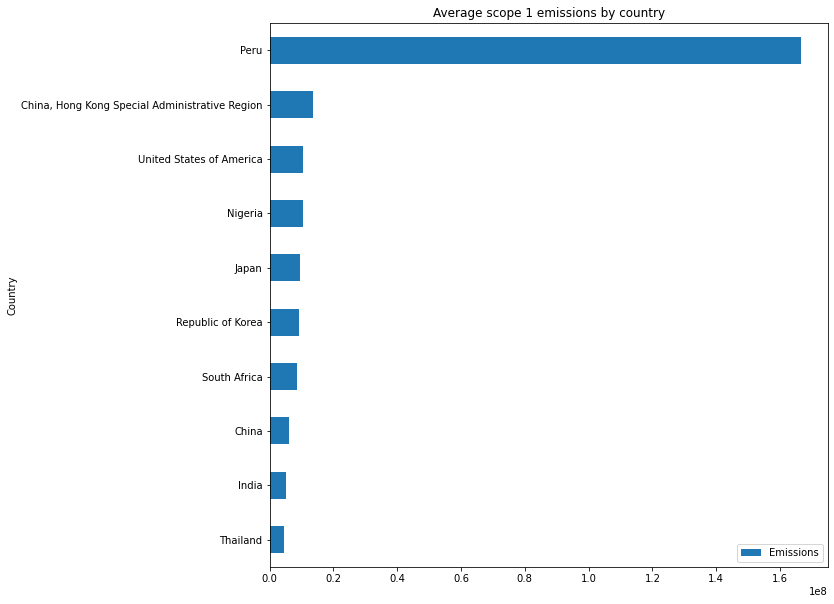

In [311]:
# Plot the graph
q46_b_s1_grouped.nlargest(10, 'Emissions').sort_values('Emissions', ascending=True).plot.barh(figsize=(10,10))
plt.title('Average scope 1 emissions by country')

# g) Please create a meaningful visualization of future expected magnitude of climate hazards. What can you tell from your visualization?


In [217]:
# Let's check out the columns
data.columns

Index(['Questionnaire', 'Year Reported to CDP', 'Account Number',
       'Organization', 'Country', 'CDP Region', 'Parent Section', 'Section',
       'Question Number', 'Question Name', 'Column Number', 'Column Name',
       'Row Number', 'Row Name', 'Response Answer', 'Comments', 'File Name',
       'Last update'],
      dtype='object')

In [235]:
# We only want the Future expected magnitude of hazard so we filter out the other ones 
q_g = data[data['Column Name'] == 'Future expected magnitude of hazard']

In [240]:
# Drop the null values form the Response Answer
q_g = q_g[q_g['Response Answer'].notna()]

In [261]:
# Now let's get the two columns that we want
q_g_country = q_g[['Country', 'Response Answer']]
q_g_high = q_g_country[q_g_country['Response Answer'] == "High"]

In [278]:
# Group by the country and reset the index
q_g_grouped = q_g_high.groupby(['Country']).count().reset_index()

In [279]:
# Rename the column 
q_g_grouped = q_g_grouped.rename(columns = {'Response Answer':'High chance of future hazard'})

In [292]:
# Now we have a data frame like this
q_g_grouped

,Country,High chance of future hazard
0,Argentina,40
1,Australia,46
2,Bangladesh,1
3,Belgium,2
4,Brazil,83
...,...,...
56,Turkey,13
57,Uganda,2
58,United Arab Emirates,1
59,United Kingdom of Great Britain and Northern I...,27


## Base on the data, we can see that the U.S has the most answers that idicate high chance of future hazard, Brazil is the second and the Canada is the third


<AxesSubplot:ylabel='Country'>

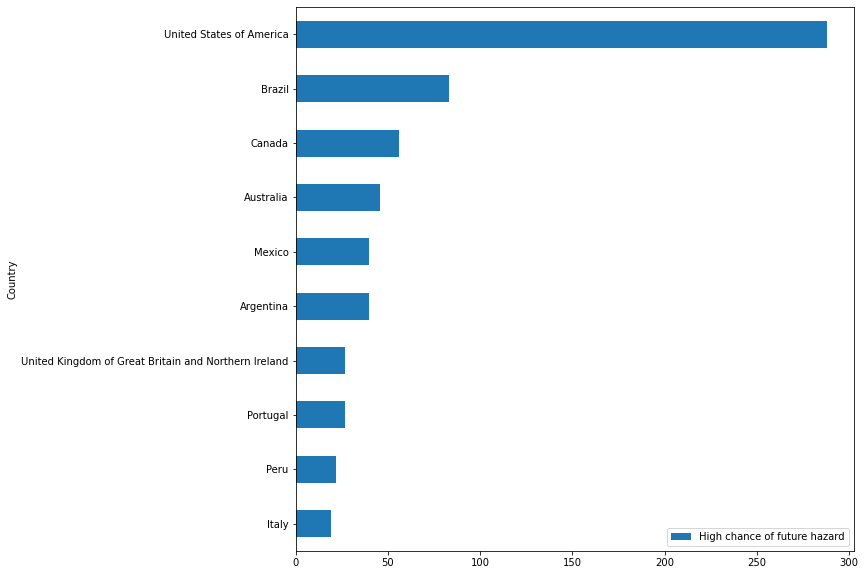

In [297]:
# Plot the graph
x = "Country"
y = "High chance of future hazard"
q_g_grouped.nlargest(10, 'High chance of future hazard').sort_values('High chance of future hazard', ascending=True).plot.barh(x, y, figsize=(10,10))